
## Model 2 : 10%의 데이터 + Data Augmentation 

In [4]:
!pip install tensorflow.python.eager

ERROR: Could not find a version that satisfies the requirement tensorflow.python.eager (from versions: none)
ERROR: No matching distribution found for tensorflow.python.eager


In [20]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from helper_functions import unzip_data, walk_through_dir, create_tensorboard_callback, plot_loss_curves

In [3]:
# 데이터 다운로드
!wget -q https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

In [4]:
# 10_food_classes_10_percent.zip 압축 해제
unzip_data("10_food_classes_10_percent.zip")

In [5]:
walk_through_dir("10_food_classes_10_percent")

10_food_classes_10_percent 폴더에는 2개의 폴더와 0개의 파일이 존재합니다.
10_food_classes_10_percent/test 폴더에는 10개의 폴더와 0개의 파일이 존재합니다.
10_food_classes_10_percent/test/ice_cream 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent/test/chicken_curry 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent/test/steak 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent/test/sushi 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent/test/chicken_wings 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent/test/grilled_salmon 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent/test/hamburger 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent/test/pizza 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent/test/ramen 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent/test/fried_rice 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent/train 폴더에는 10개의 폴더와 0개의 파일이 존재합니다.
10_food_classes_10_percent/train/ice_cream 폴더에는 0개의 폴더와 75개의 파일이 존재합니다.
10_food_classes_10_percent/train

In [16]:
# 상수 선언
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCH_COUNT = 5

train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir_10_percent = "10_food_classes_10_percent/test/"

In [9]:
# 데이터 셋 준비
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir_10_percent,
    image_size = IMAGE_SIZE,
    label_mode = "categorical",
    batch_size = BATCH_SIZE
)

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir_10_percent,
    image_size = IMAGE_SIZE,
    label_mode = "categorical",
    batch_size = BATCH_SIZE
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [10]:
# Data Augmentation
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomWidth(0.2)
], name="data_augmentation")

In [13]:
# Model 2 : 10%의 데이터 + Data Augmentation 

input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape, name = "model_2_input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name = "model_2_global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation = "softmax", name = "model_2_output_layer")(x)

model_2 = keras.Model(inputs, outputs)


# 컴파일과 fitting
model_2.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [12]:
# checkpoint 위치 지정
checkpoint_path = "10_percent_model_checkpoints_weights/chechpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path,
    save_weights_only = True, # 전체 모델을 저장하려면 False로 지정
    save_best_only = False, # 각 epoch의 모델 대신 최적화 된 모델을 지정하려면 True로 지정
    save_freq = "epoch", # 매 epoch 저장
)

In [17]:
history_10_percent_data_augment = model_2.fit(
    train_data_10_percent,
    epochs = EPOCH_COUNT,
    steps_per_epoch = len(train_data_10_percent),
    validation_data = test_data_10_percent,
    validation_steps = len(test_data_10_percent),
    callbacks = [
        create_tensorboard_callback("transfer_learning", "10_percent_data_augment"),
        checkpoint_callback
    ]
)

TensorBoard 로그 파일을 저장한 디렉토리 : transfer_learning/10_percent_data_augment/20210620-104256
Epoch 1/5
24/24 [==============================] - 190s 8s/step - loss: 2.0837 - accuracy: 0.2773 - val_loss: 1.5489 - val_accuracy: 0.6312
Epoch 2/5
24/24 [==============================] - 164s 7s/step - loss: 1.4330 - accuracy: 0.6307 - val_loss: 1.1224 - val_accuracy: 0.7516
Epoch 3/5
24/24 [==============================] - 154s 7s/step - loss: 1.1379 - accuracy: 0.7067 - val_loss: 0.9188 - val_accuracy: 0.7904
Epoch 4/5
24/24 [==============================] - 162s 7s/step - loss: 0.9788 - accuracy: 0.7493 - val_loss: 0.8031 - val_accuracy: 0.7976
Epoch 5/5
24/24 [==============================] - 149s 6s/step - loss: 0.8771 - accuracy: 0.7707 - val_loss: 0.7308 - val_accuracy: 0.8164


In [18]:
result_10_percent_data_augment = model_2.evaluate(test_data_10_percent)
result_10_percent_data_augment

79/79 [==============================] - 111s 1s/step - loss: 0.7308 - accuracy: 0.8164


[0.7307954430580139, 0.8163999915122986]

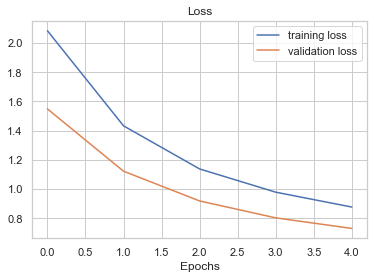

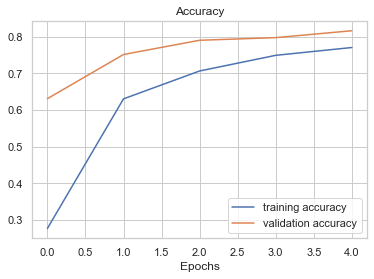

In [21]:
plot_loss_curves(history_10_percent_data_augment)

In [24]:
model_2.load_weights(checkpoint_path)
loaded_weight_model_result = model_2.evaluate(test_data_10_percent)


79/79 [==============================] - 123s 2s/step - loss: 0.7308 - accuracy: 0.8164


In [25]:
result_10_percent_data_augment == loaded_weight_model_result

False

In [26]:
np.isclose(
    np.array(result_10_percent_data_augment),
    np.array(loaded_weight_model_result)
    )

array([ True,  True])

In [27]:
print(
    np.array(result_10_percent_data_augment) - np.array(loaded_weight_model_result)
    )

[-2.98023224e-07  0.00000000e+00]


In [28]:
# Model 2 : 10%의 데이터 + Data Augmentation + epoch 50

input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape, name = "model_2_input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name = "model_2_global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation = "softmax", name = "model_2_output_layer")(x)

model_2 = keras.Model(inputs, outputs)


# 컴파일과 fitting
model_2.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [30]:
# checkpoint 위치 지정
checkpoint_path = "10_percent_model_checkpoints_weights_epoch50/chechpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path,
    save_weights_only = True, # 전체 모델을 저장하려면 False로 지정
    save_best_only = False, # 각 epoch의 모델 대신 최적화 된 모델을 지정하려면 True로 지정
    save_freq = "epoch", # 매 epoch 저장
    verbose = 1
)

In [31]:
history_10_percent_data_augment_epoch50 = model_2.fit(
    train_data_10_percent,
    epochs = 50,
    steps_per_epoch = len(train_data_10_percent),
    validation_data = test_data_10_percent,
    validation_steps = len(test_data_10_percent),
    callbacks = [
        create_tensorboard_callback("transfer_learning", "10_percent_data_augment_epoch50"),
        checkpoint_callback
    ]
)

TensorBoard 로그 파일을 저장한 디렉토리 : transfer_learning/10_percent_data_augment_epoch50/20210620-111819
Epoch 1/50
24/24 [==============================] - 176s 7s/step - loss: 1.9966 - accuracy: 0.3493 - val_loss: 1.4926 - val_accuracy: 0.6612

Epoch 00001: saving model to 10_percent_model_checkpoints_weights_epoch50/chechpoint.ckpt
Epoch 2/50
24/24 [==============================] - 121s 5s/step - loss: 1.3993 - accuracy: 0.6440 - val_loss: 1.0926 - val_accuracy: 0.7544

Epoch 00002: saving model to 10_percent_model_checkpoints_weights_epoch50/chechpoint.ckpt
Epoch 3/50
24/24 [==============================] - 121s 5s/step - loss: 1.1073 - accuracy: 0.7373 - val_loss: 0.8928 - val_accuracy: 0.7848

Epoch 00003: saving model to 10_percent_model_checkpoints_weights_epoch50/chechpoint.ckpt
Epoch 4/50
24/24 [==============================] - 121s 5s/step - loss: 0.9522 - accuracy: 0.7360 - val_loss: 0.7920 - val_accuracy: 0.8008

Epoch 00004: saving model to 10_percent_model_checkpoints_weights_

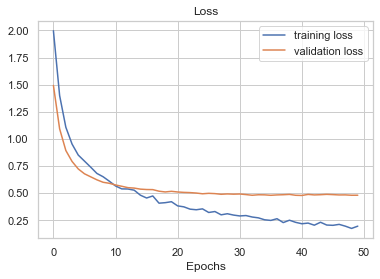

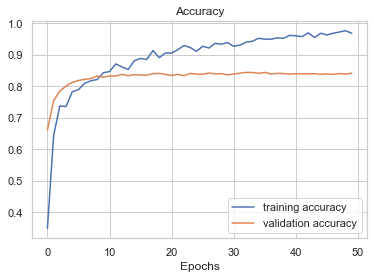

In [33]:
plot_loss_curves(history_10_percent_data_augment_epoch50)